## Import the data

In [1]:
# Import the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-07-10 20:52:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   110MB/s    in 5.0s    

2021-07-10 20:52:39 (98.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [23]:
# Unzip the data
!unzip -qq '/content/10_food_classes_all_data.zip'

replace __MACOSX/._10_food_classes_all_data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Explore the data

In [3]:
import os
for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.')

There are 2 directories and 0 files in /content/10_food_classes_all_data.
There are 10 directories and 0 files in /content/10_food_classes_all_data/train.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/ramen.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/ice_cream.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/steak.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/pizza.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/sushi.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 files in /content/10_food_classes_all_data/train/chicken_wings.
There are 0 directo

In [4]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Dec 10  2020 .
drwxr-xr-x  1 root root 4096 Jul 10 20:52 ..
drwxr-xr-x 12 root root 4096 Dec 10  2020 test
drwxr-xr-x 12 root root 4096 Dec 10  2020 train


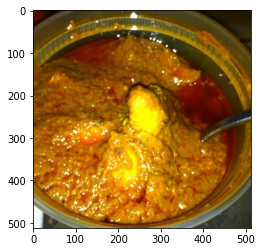

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Explore an image
img = tf.io.read_file('/content/10_food_classes_all_data/train/chicken_curry/1004867.jpg')
img = tf.image.decode_image(img)
plt.imshow(img);

In [6]:
# Setup the train and test directories
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [7]:
import pathlib
# Get the class names from directories
train_path = pathlib.Path(train_dir)
class_names = sorted([item.name for item in train_path.glob('*')])
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


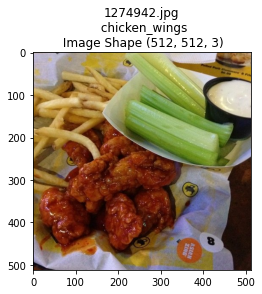

In [8]:
# randomly visualize image

import random
random_class = random.choice(class_names)
p = pathlib.Path(f'/content/10_food_classes_all_data/train/{random_class}')
img_path = random.choice([*p.glob('*')])
img_path.home()

img = tf.io.read_file(str(img_path))
img = tf.image.decode_image(img)
plt.imshow(img)
plt.title(f'{img_path.name}\n {img_path.parent.name}\n Image Shape {img.shape}');

## Preprocess and prepare the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create augmented and normalized train data generators
train_data_gen_aug = ImageDataGenerator(rotation_range=0.2, 
                                        width_shift_range=0.2, 
                                        height_shift_range=0.2, 
                                        shear_range=0.2, 
                                        zoom_range=0.2, 
                                        rescale=1./255)

# Create test data generator and rescale the image to normalize the data
test_data_gen = ImageDataGenerator(rescale=1./255)

train_data_aug = train_data_gen_aug.flow_from_directory(train_dir, 
                                                        target_size=(224, 224), 
                                                        batch_size=32, 
                                                        seed=42)

test_data = test_data_gen.flow_from_directory(test_dir, 
                                              target_size=(224, 224),
                                              batch_size=32,
                                              seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create the model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.activations import relu, softmax

# Create the model
model_1 = Sequential()

# Add input layer
model_1.add(InputLayer(input_shape=(224, 224, 3)))

# Add hidden layers
model_1.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid', 
                   activation=relu))
model_1.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid', 
                   activation=relu))
model_1.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))

model_1.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid', 
                   activation=relu))
model_1.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid', 
                   activation=relu))
model_1.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))

# Add the flatten layer
model_1.add(Flatten())

# Add the output layer
model_1.add(Dense(units=10, activation=softmax))

# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import categorical_accuracy

# Compile the model
model_1.compile(optimizer=Adam(),
                loss=CategoricalCrossentropy(),
                metrics=[categorical_accuracy])

In [12]:
# Fit the model
history_1 = model_1.fit(train_data_aug,
                        epochs=5, 
                        verbose=1, 
                        callbacks=None,
                        validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 417s 2s/step - loss: 2.1873 - categorical_accuracy: 0.1917 - val_loss: 2.0342 - val_categorical_accuracy: 0.2812
Epoch 2/5
235/235 [==============================] - 416s 2s/step - loss: 2.0669 - categorical_accuracy: 0.2628 - val_loss: 1.9794 - val_categorical_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 417s 2s/step - loss: 2.0373 - categorical_accuracy: 0.2729 - val_loss: 1.9782 - val_categorical_accuracy: 0.2960
Epoch 4/5
235/235 [==============================] - 419s 2s/step - loss: 2.0226 - categorical_accuracy: 0.2856 - val_loss: 1.8991 - val_categorical_accuracy: 0.3344
Epoch 5/5
235/235 [==============================] - 421s 2s/step - loss: 1.9917 - categorical_accuracy: 0.3040 - val_loss: 1.8954 - val_categorical_accuracy: 0.3364


## Evaluate the model

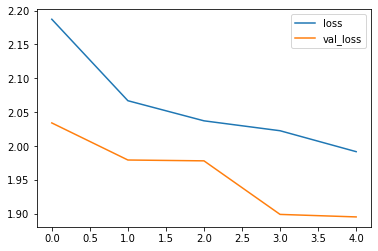

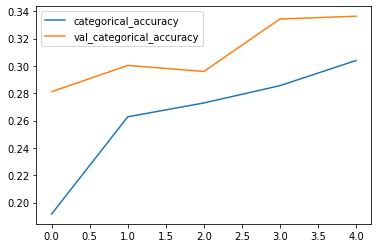

In [13]:
import pandas as pd
pd.DataFrame(history_1.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history_1.history).loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()

In [14]:
## Make predictions with the model

In [15]:
# Import the image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg

--2021-07-10 21:28:30--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2021-07-10 21:28:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-07-10 21:28:31 (74.3 MB/s) - ‘03-pizza-dad.jpe

In [16]:
def load_and_prep_image(image_path, img_shape=224):
  """
  Loads image from image_path and resize it to [img_shape, img_shape]
  """
  # Read image file
  img = tf.io.read_file(image_path)
  # Decode file to image
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # # Normalize the image
  img = img / 255.

  return img

In [17]:
def pred_and_plot(model, file_path, img_shape=224, class_names=class_names):
  """
  Uses a trained model to predict the class of an image 
  """
  # Preprocess and prepare the image
  img = load_and_prep_image(file_path, img_shape=224)
  # Use the mode to predict probabilities of the image belonging to different classes
  pred_probs = model.predict(tf.expand_dims(img, axis=0))
  # Print pred_probs
  print(pred_probs)
  # Squeeze the preds tensor and find the index of the max probability
  pred_class = pred_probs.squeeze().argmax()
  # Return the pred class name
  pred_class_name = dict(enumerate(class_names))[pred_class]
  # Plot the image
  plt.imshow(img)
  plt.title(pred_class_name);

[[0.04565879 0.03243918 0.07793739 0.06977645 0.06086344 0.21669134
  0.09130956 0.13615826 0.1084048  0.16076082]]


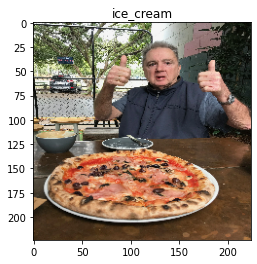

In [18]:
pred_and_plot(model_1, '/content/03-pizza-dad.jpeg', 
              img_shape=224, class_names=class_names)

In [19]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg

--2021-07-10 21:28:31--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2021-07-10 21:28:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-07-10 21:28:32 (67.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

[[0.02661142 0.0400864  0.05182089 0.15681948 0.0884569  0.09954453
  0.02305432 0.09795135 0.3766424  0.03901234]]


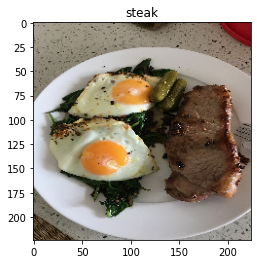

In [20]:
pred_and_plot(model_1, '/content/03-steak.jpeg', 
              img_shape=224, class_names=class_names)

In [21]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-sushi.jpeg

--2021-07-10 21:28:32--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg [following]
--2021-07-10 21:28:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.05s   

2021-07-10 21:28:33 (31.5 MB/s) - ‘03-sushi.jpeg’ saved [1725178/17

[[0.15959209 0.07378678 0.09822245 0.12156476 0.07878334 0.02557851
  0.13686925 0.10107838 0.06956387 0.13496059]]


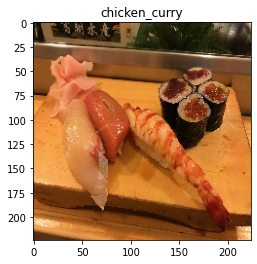

In [22]:
pred_and_plot(model_1, '/content/03-sushi.jpeg', 
              img_shape=224, class_names=class_names)